# Exercises - Week 6 - Regularization
#### Simon Lee, BIO-322, Machine Learning for Bioengineers, Winter 2022

## Conceptual
#### Exercise 1.
We review here the two formulations of regularization.
A standard approach to solve constraint optimization
problems makes use of Karush-Kuhn-Tucker (KKT) multipliers. For example, to find
the minimum of function $f(x)$ under the constraint $g(x) \leq s$ one can define
the loss function $L(x, \lambda) = f(x) + \lambda(g(x) - s)$ where
$\lambda\geq0$ is a KKT multiplier.  Minimizing the loss both in $x$ and
$\lambda$ amounts to solving the equations $\frac{\partial L}{\partial x} = f'(x) + \lambda g'(x) = 0$ and $\frac{\partial L}{\partial \lambda} = g(x) - s = 0$,
if the solution is on the boundary of the area defined by the inequality
constraint; otherwise one can find the solution by simply solving the
unconstrained problem, i.e. with $\lambda = 0$. In this formulation one choses
the size $s$ of the allowed area and finds $\lambda$ by solving the equations.
Interestingly, the loss function $L(x) = f(x) + \lambda
g(x)$ has exactly the same partial derivative in $x$ as $L(x, \lambda)$ and
therefore all critical points of $L(x)$ have corresponding critical
points of $L(x,\lambda)$. Because of this, regularization is often formulated
as \"adding a regularization term to the cost function\". For example, given the loss
    function of linear regression $L(\beta) = \frac1n\sum_{i=1}^n(y_i - \beta_0 + \beta_1x_{i1} + \cdots + \beta_p x_{ip})^2$ one can define the
        L1-regularized loss function $L_\mathrm{L1}(\beta) = L(\beta) + \lambda
\|\beta\|_1$ and choose a value for $\lambda$ instead of the size $s$ of the
allowed area.
1. Derive how $\lambda$ in the second formulation depends on $s$ in the first formulation for ridge regression with standardized one-dimensional input. *Hint:* use the analytical solution at the top of this notebook, the fact that $\langle x \rangle = 0$ and $\langle x^2\rangle = 1$ and note that $\beta_0^2 + \beta_1^2 = s$, if the solution lies on the boundary.
1. Argue, why choosing $\lambda = 0$ in the second formulation is equivalent to choosing a sufficiently large $s$ in the first formulation.
2. Argue, why choosing $\lambda = \infty$ in the second formulation is equivalent to choosing $s = 0$ in the first formulation.

#### Solution

* We can plug in the analytical solution for $\beta_0$ and $\beta_1$ at the top of the notebook on regularization and use the simplifications $\langle x\rangle = 0$ and $\langle x^2\rangle = 1$:

$$
\begin{align*}
\beta_0^2 + \beta_1^2 = s\\
\Rightarrow \left(\frac{\langle y\rangle}{1 + \lambda}\right)^2 + \left(\frac{\langle xy\rangle}{1 + \lambda}\right)^2 = s\\
\Rightarrow \lambda = \sqrt{\frac{\langle xy \rangle^2 + \langle y\rangle^2}{s}} - 1
\end{align*}
$$

as long as $s < \langle xy \rangle^2 + \langle y\rangle^2$, otherwise $\lambda = 0$.

* When $\lambda=0$, we can directly see that the minimum of $L_\mathrm{L1}(\beta)=L(\beta)$ is the minimum of the first formulation without any constraints. Having no constraints is equivalent to setting $s$ to a value that is larger than the length of the unregularized solution (as measured in the chosen norm). With $s = \infty$ this is always satisfied.

* When $\lambda$ is very large, we can make the approximation $L_\mathrm{L1}(\beta) = L(\beta) + \lambda \|\beta\|_1 \approx \lambda \|\beta\|_1$. Because $\|\beta\|_1 \geq 0$, we have a minimum at $\|\beta\|=0$. This corresponds to setting $c=0$ in the first formulation.


#### Exercise 2.
Consider a data set with as many data points as predictors $n = p$.
Assume $x_{ii} = 1$ and $x_{ij} = 0$ for all $i\neq j$ and arbitrary values
$y_i$. To simplify the problem further we perform regression without an
intercept. We would like to study L1- and L2-regularized multiple linear regression.
1. Write the mean squared error loss once with L1 regularization and once with L2 regularization for this setting and the fomulation of regularization with regularization constant $\lambda$.
2. Show that in the case of L2 regularization the estimated coefficients take the form $\hat \beta_j = y_j/(1 + n\lambda)$.
3. Show that in the case of L1 regularization the estimated coefficients take the form $\hat \beta_j = y_j - \lambda \cdot n/2$, if $y_j > \lambda\cdot n/2$, $\hat \beta_j = y_j + \lambda\cdot n/2$, if $y_j < -\lambda\cdot n/2$ and $\hat \beta_j = 0$ otherwise.
4. Write a brief summary on how the estimated coefficients $\hat \beta_j$ are changed relative to the unregularized solution for both kinds of regularization.


#### Solution

The RSS with L1 regularization is
$$
L(\boldsymbol{\beta}) = \frac1n\sum_{i=1}^n (y_i - \boldsymbol{\beta} \cdot \mathbf{x}_i)^2 + \lambda \Vert\boldsymbol{\beta}\Vert_1 = \frac1n\sum_{i=1}^n (y_i - \beta_i)^2 + \lambda \sum_{j=1}^p \vert\beta_j\vert = \frac1n\sum_{i=1}^n(y_i - \beta_i)^2 + \lambda\vert\beta_i\vert
$$

The RSS with L2 regularization is
$$
L(\boldsymbol{\beta}) = \frac1n\sum_{i=1}^n (y_i - \boldsymbol{\beta} \cdot \mathbf{x}_i)^2 + \lambda \Vert\boldsymbol{\beta}\Vert_2^2 = \frac1n\sum_{i=1}^n (y_i - \beta_i)^2 + \lambda \sum_{j=1}^p \beta_j^2= \frac1n\sum_{i=1}^n (y_i - \beta_i)^2 + \lambda \beta_i^2
$$

#### Exercise 3.
Create an artificial dataset with 100 points, 4 predictors $X_1, X_2, X_3, X_4$
and $Y = X_1 + \epsilon$ with $\mathrm{Var}(\epsilon) = 0.1^2$.
You can use the following function to create the dataset
$`julia
function data_generator(β; rng = Xoshiro(1), n = 100)
    X = randn(rng, n, 4)
    Y = X * β .+ randn(rng, n) * 0.1
    data = DataFrame(X, :auto)
    data.y = Y
    data
end
data1 = data_generator([1, 0, 0, 0])
$`
1. Find with 20-fold cross-validation and the lasso the best model. *Hint:* use a self-tuning machine.
2. Find with 20-fold cross-validation and the ridge regression the best model.
3. Which of the two best models has the lowest test error? *Hint:* use a large test set with $10^6$ points and a different random seed and the `rmse` loss, e.g.
$`julia
test_data1 = data_generator([1, 0, 0, 0], rng = Xoshiro(1234), n = 10^6);
function average_test_error(mach, test_data)
    MLJ.rmse(predict(mach, select(test_data, Not(:y))), test_data.y)
end
$`
4. Repeat the above 3 steps on an artificial data set with 100 points and 4 predictors with $Y = 10X_1 + X_2 + .1 * X_3 + .01 * X_4 + \epsilon$.

In [1]:
begin
    using Pkg
    Pkg.activate(joinpath(Pkg.devdir(), "MLCourse"))
    using DataFrames, MLJ, MLJLinearModels, MLCourse, Random, Plots
end

  Activating project at `~/.julia/dev/MLCourse`


In [2]:
function data_generator(β; rng = Xoshiro(1), n = 100)
    X = randn(rng, n, length(β))
    Y = X * β .+ randn(rng, n) * 0.1
    data = DataFrame(X, :auto)
    data.y = Y
    data
end

data_generator (generic function with 1 method)

In [3]:
function tune_model(model, data)
	tuned_model = TunedModel(model = model,
	                         resampling = CV(nfolds = 20),
	                         tuning = Grid(goal = 200),
	                         range = range(model, :lambda,
									       scale = :log10,
									       lower = 1e-30, upper = 1e-1),
	                         measure = rmse)
	mach = machine(tuned_model, select(data, Not(:y)), data.y)
	fit!(mach, verbosity = 0)
end

tune_model (generic function with 1 method)

In [4]:
data1 = data_generator([1, 0, 0, 0])

,x1,x2,x3,x4,y
,Float64,Float64,Float64,Float64,Float64
1,0.0619327,-0.204376,0.677425,0.591256,0.0732767
2,0.278406,-0.302368,-1.29306,-0.31436,0.36163
3,-0.595824,-0.988951,-0.231259,-0.198573,-0.77832
4,0.0466594,0.473685,-0.47852,-1.4084,0.0194885
5,1.08579,0.507959,1.61237,2.20966,1.0666
6,-1.57656,0.140021,-2.01094,-1.36641,-1.7328
7,0.17594,0.289954,1.38809,-1.29088,0.353831
8,0.865381,0.774264,0.994197,-0.269745,0.889006
9,-2.79028,0.84462,-0.443896,1.23558,-2.71332


In [5]:
res1_lasso = tune_model(LassoRegressor(), data1);

In [7]:
res1_ridge = tune_model(RidgeRegressor(), data1);

In [8]:
fitted_params(res1_ridge)

(best_model = RidgeRegressor(lambda = 0.0006517339604882427, …),
 best_fitted_params = (coefs = [:x1 => 1.0060274536230172, :x2 => -0.007801612145875333, :x3 => 0.005708281400470629, :x4 => -0.008605670619571064],
                       intercept = 0.009428789305511845,),)

In [9]:
fitted_params(res1_lasso)

(best_model = LassoRegressor(lambda = 0.013354515629298987, …),
 best_fitted_params = (coefs = [:x1 => 0.9924426735726978, :x2 => -0.0, :x3 => 0.0, :x4 => -0.0],
                       intercept = 0.010839215261411631,),)

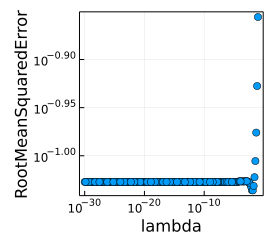

In [10]:
plot(res1_lasso, yscale = :log10)

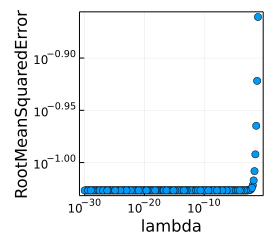

In [11]:
plot(res1_ridge, yscale = :log10)

In [12]:
test_data1 = data_generator([1, 0, 0, 0], rng = Xoshiro(1234), n = 10^6);

In [13]:
average_test_error(mach, test_data) = MLJ.rmse(predict(mach, select(test_data, Not(:y))), test_data.y)

average_test_error (generic function with 1 method)

In [14]:
(average_test_error(res1_lasso, test_data1),
 average_test_error(res1_ridge, test_data1))

(0.10075554507799983, 0.10134671835876725)

In [15]:
fitted_params(res1_lasso).best_fitted_params

(coefs = [:x1 => 0.9924426735726978, :x2 => -0.0, :x3 => 0.0, :x4 => -0.0],
 intercept = 0.010839215261411631,)

In [16]:
fitted_params(res1_ridge).best_fitted_params

(coefs = [:x1 => 1.0060274536230172, :x2 => -0.007801612145875333, :x3 => 0.005708281400470629, :x4 => -0.008605670619571064],
 intercept = 0.009428789305511845,)

In [17]:
data2 = data_generator([10, 1, .1, .01])

,x1,x2,x3,x4,y
,Float64,Float64,Float64,Float64,Float64
1,0.0619327,-0.204376,0.677425,0.591256,0.49995
2,0.278406,-0.302368,-1.29306,-0.31436,2.43247
3,-0.595824,-0.988951,-0.231259,-0.198573,-7.1548
4,0.0466594,0.473685,-0.47852,-1.4084,0.851172
5,1.08579,0.507959,1.61237,2.20966,11.53
6,-1.57656,0.140021,-2.01094,-1.36641,-15.9966
7,0.17594,0.289954,1.38809,-1.29088,2.35314
8,0.865381,0.774264,0.994197,-0.269745,9.54842
9,-2.79028,0.84462,-0.443896,1.23558,-27.0133


In [18]:
res2_lasso = tune_model(LassoRegressor(), data2);

In [19]:
res2_ridge = tune_model(RidgeRegressor(), data2);

In [20]:
test_data2 = data_generator([10, 1, .1, .01], rng = Xoshiro(123), n = 10^6);

In [21]:
(average_test_error(res2_lasso, test_data2),
 average_test_error(res2_ridge, test_data2))

(0.10169291698866846, 0.1014519400231941)

- In this case the ridge regression seems to find a slightly better solution. However, depening on the seed of the random number generator used to generate the training set, the results can look differently.